# TP Théorie et codage de l'information

## Etudiant : Moncef REJEB SFAR

# Lab 2

### Question 1
Téléchargement de la photo sur laquelle on va travailler


Téléchargement de la photo sur laquelle on va travailler


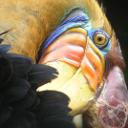

In [16]:
#Lab 2
#Question1
import numpy as np
from PIL import Image
from scipy import *
image = Image.open('bird_small.tiff')
image.save('bird_small.jpg')
from IPython.display import Image
print("Téléchargement de la photo sur laquelle on va travailler")
Image("bird_small.jpg")



### Question 2 et 3 
Application de la méthode kmeans sur cette image via les librairies de sklearn.

On peut modifier la variable n_colors pour choisir le nombre de couleurs qu'on veut obtenir à la fin.
Dans cet exemple nous allons essayer de s'approcher au maximum de l'image de départ en ne gardant que 16 couleurs.
Voici les différentes étapes pour faire ces 2 questions:

Etape 1 : Reshape de l'image de départ

Etape 2 : Application de la fonction KMEANS

Etape 3 : Calcul des labels

Etape 4 : Obtention du codebook

Etape 5 : Recréation de la nouvelle image et affichage 

Remarque : pour bien se rendre compte de l'apport de la méthode Kmeans, j'ai rajouté une image crée avec 16couleurs aléatoires. On peut, ainsi voir que kmeans est nettement meilleur

Fitting model on a small sub-sample of the data
6.5259714628365035
done in 0.423s.
Predicting color indices on the full image (k-means)
done in 0.011s.
16384
[9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 15, 0, 9, 9, 8, 9, 15, 7, 7, 12, 12]
Predicting color indices on the full image (random)
done in 0.012s.


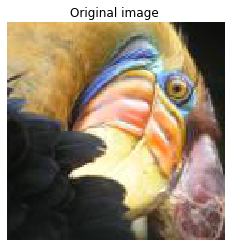

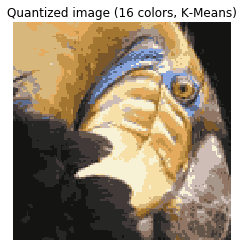

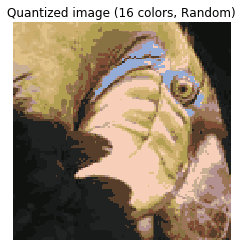

In [2]:
#Lab 2
#Question 2 et 3
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 16

image = Image.open('bird_small.jpg')

image = np.array(image, dtype=np.float64) / 255

w, h, d = original_shape = tuple(image.shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image ')
plt.imshow(image)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (16 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (16 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()


### Question 4

on va mesurer la distorsion D(k) : D en fonction du nombre de couleurs k et afficher la courbe D=f(k) pour k de 1 à 15. 

La distorsion est calculée à l'aide de l'attribut kmeans.inertia_
On obtient une courbe décroissante 

la distorsion pour k = 1 est : 249.906269
la distorsion pour k = 2 est : 68.375851
la distorsion pour k = 3 est : 38.624701
la distorsion pour k = 4 est : 26.931431
la distorsion pour k = 5 est : 21.452176
la distorsion pour k = 6 est : 17.375569
la distorsion pour k = 7 est : 14.955707
la distorsion pour k = 8 est : 13.303835
la distorsion pour k = 9 est : 11.980448
la distorsion pour k = 10 est : 10.760144
la distorsion pour k = 11 est : 9.597212
la distorsion pour k = 12 est : 8.752477
la distorsion pour k = 13 est : 7.827844
la distorsion pour k = 14 est : 7.282303
la distorsion pour k = 15 est : 6.818369
voici le tableau des distorsion (axes des ordonnées)
 [249.9062685274894, 68.37585076322374, 38.62470099478033, 26.93143086207168, 21.452175631751558, 17.375569066614375, 14.9557070933079, 13.30383496596934, 11.980448017861761, 10.760144074531674, 9.597211954341198, 8.752476675751648, 7.827843546507905, 7.282303446485349, 6.818368839583884]


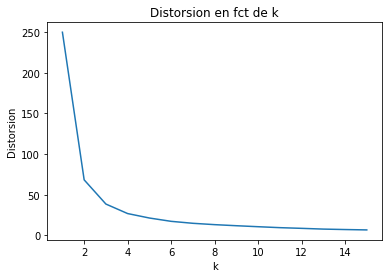

In [3]:
#Question 4

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
tabOfDistorsion=[]
for k in range(1,16):   
    n_colors = k
    image = Image.open('bird_small.jpg')
    image = np.array(image, dtype=np.float64) / 255
    w, h, d = original_shape = tuple(image.shape)
    assert d == 3
    image_array = np.reshape(image, (w * h, d))
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    tabOfDistorsion.append(kmeans.inertia_)
    
    print("la distorsion pour k = %d est : %f" %(k,kmeans.inertia_))

MesuresDuNombrek=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

print("voici le tableau des distorsion (axes des ordonnées)\n",tabOfDistorsion)     
plt.plot(MesuresDuNombrek,tabOfDistorsion)  
plt.ylabel('Distorsion')
plt.xlabel("k")
plt.title("Distorsion en fct de k")
plt.show()

### Question 5
On va mesurer le code Rate R(k) à l'aide de la fonction CalculateCodingRate
J'ai fait cette fonction en m'inspirant de la fonction encoder RLE faite au lab1 puisque le code rate est simplement l'entropie des valeurs obtenues pour chaque pixel à l'aide du codage RLE

Ensuite  j'ai tracé la courbe  D(k) en fonction de R(k) pour k de 2 à 20

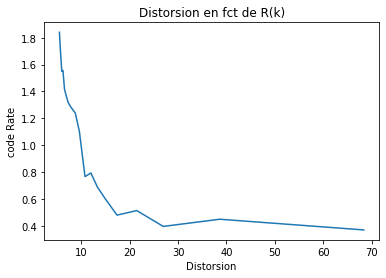

In [10]:
#Question 5

import re
import math
from scipy import *
#RLE(run-length encoding) encoder
def CalculateCodingRate(string):
    if string == '':
        return ''
    i = 0
    count = 0
    letter = string[i]
    rle = []
    Nb = []
    somme=0
    while i <= len(string) - 1:        
        while string[i] == letter:
            i+= 1
            count +=1
            #catch the loop on last character so it doesn't got to top and access out of bounds
            if i > len(string) - 1:
                break
        if (count==1):
            Nb.append(1.0)
        else:
            Nb.append(ceil(math.log(int('{0}'.format(count)),2)))
            rle.append('{1}{0}'.format(count, letter))
        if i > len(string) - 1: 
            break
        letter = string[i]
        count = 0
    for ele in range(0, len(Nb)): 
        somme = somme + Nb[ele] 
    return Nb

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from scipy.stats import entropy
from time import time
tabOfDistorsion=[]
tabOfCodeRate=[]
def entropy1(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    return entropy(counts, base=base)

for k in range(2,21):   
    n_colors = k
    image = Image.open('bird_small.jpg')
    image = np.array(image, dtype=np.float64) / 255
    w, h, d = original_shape = tuple(image.shape)
    assert d == 3
    image_array = np.reshape(image, (w * h, d))
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    tabOfDistorsion.append(kmeans.inertia_)
    labels = kmeans.predict(image_array)
    ch=""
    for j in range(len(labels)):
        ch+=str(labels[j])
    x=entropy1(CalculateCodingRate(ch))
    tabOfCodeRate.append(x)
    
plt.ylabel('code Rate')
plt.xlabel("Distorsion")
plt.title("Distorsion en fct de R(k)")
tabOfCodeRate.reverse()
plt.plot(tabOfDistorsion,tabOfCodeRate)  
plt.show()